In [9]:
%matplotlib inline
from random import randint
import numpy as np
import matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def calculatePrediction(ex, w):
        result = 0
        for i in range(len(w)):
            result += np.array(ex)**i * w[i]
        return result

In [11]:
def MSE(predictedY, realY):
    error = 0
    for i in range(0, len(realY)):
        error+=  (predictedY[i] - realY[i])**2
    return error/len(realY)  

In [12]:
def PLR(degree, x):
    ft = np.expand_dims(x, axis=1)
    for i in range(0, degree+1): 
        ft = np.insert(ft, i, x**(i), axis=1)
    ft = np.delete(ft, -1, axis=1)
    return ft

In [13]:
def predict2L(x, y, reg, degree):
    regTerm = reg * np.identity(degree+1)
    term1 = np.linalg.inv(np.matmul(x.T, x) + regTerm)
    term2 = np.matmul(x.T, y)
    w = np.matmul(term1, term2)
    return w

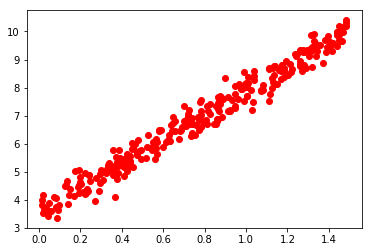

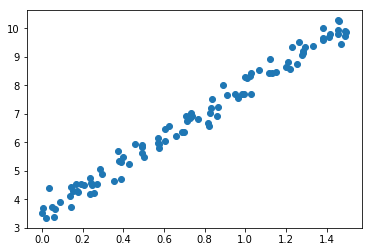

array([1.08512034, 0.74828297, 0.93864793, 0.85942415, 1.25315317,
       0.36408641, 0.37814378, 0.90209575, 1.02025267, 0.88034437,
       1.09390798, 0.459981  , 1.31715243, 0.85897113, 1.30071339,
       1.28788918, 0.42588564, 0.67373671, 0.60474032, 0.5263382 ,
       0.99499549, 1.00297116, 0.6381801 , 0.38429724, 0.58557087,
       0.55039725, 0.79608593, 0.60400329, 0.82191651, 0.68043876,
       1.16763677, 0.65164114, 0.98356323, 0.92729793, 1.06834288,
       0.74888179, 0.4656693 , 0.74574467, 0.76192148, 0.41783856,
       0.58086371, 0.83387771, 0.57755942, 0.71710098, 1.1828984 ,
       0.48533123, 1.04351123, 0.94279501, 1.12997166, 0.86540237,
       1.02087058, 0.91027925, 0.83016396, 0.72341405, 0.57186876,
       1.25871386, 0.63156958, 1.1114252 , 0.59195672, 0.91819915,
       0.53711088, 1.2171255 , 1.25463511, 0.7160822 , 0.70803916,
       0.51360294, 0.56899377, 0.96885112, 0.78724061, 0.56840785,
       0.9432027 , 1.01047942, 0.47898989, 0.75543896, 0.54672

In [14]:
dir =  os.path.dirname(os.path.realpath('__file__'))

trainFilePath = dir +  "/Datasets/Dataset_2_train.csv"
validFilePath = dir +  "/Datasets/Dataset_2_valid.csv"

trainFile = pd.read_csv(trainFilePath, header=None)
trainFile = trainFile.drop([2], axis=1)
trainX = trainFile[0]
trainY = trainFile[1]

validFile = pd.read_csv(validFilePath, header=None)
validFile = validFile.drop([2], axis=1)
validX = validFile[0]
validY = validFile[1]

w = np.random.rand(2,1)
predictedY = calculatePrediction(trainX, w)
wa = np.array(w)

plt.plot(trainX,trainY,'ro', label="Train")
plt.show()

plt.plot(validX,validY,'o', label="Valid")
plt.show()

predictedY

In [15]:
alpha = 1e-06

testW = np.array(w)
validMSE = []
trainMSE = []
epoch = 0
while(epoch < 5000):
    for i in range(0, len(predictedY)-1):
        temp0 = testW[0] - alpha * (predictedY[i]- trainY[i])
        temp1 = testW[1] - alpha * (predictedY[i]- trainY[i])* trainX[i]
        testW[0] = temp0
        testW[1] = temp1
        predictedTrainY = calculatePrediction(trainX, testW)
        predictedValidY = calculatePrediction(validX, testW)

    epoch += 1
    validMSE.append(MSE(predictedValidY, validY))
    trainMSE.append(MSE(predictedTrainY, trainY))
    if(epoch % 200 == 0):
        print("Epoch: ", epoch)
        print("MSE valid: ", MSE(predictedValidY, validY))
        print("MSE train: ", MSE(predictedTrainY, trainY))
    

Epoch:  200
MSE valid:  31.48479534740327
MSE train:  31.6597117085129
Epoch:  400
MSE valid:  25.002110266687215
MSE train:  25.1204031604063
Epoch:  600
MSE valid:  19.269618201275204
MSE train:  19.340416016945014
Epoch:  800
MSE valid:  14.287319151168349
MSE train:  14.319750278130117
Epoch:  1000
MSE valid:  10.055213116367964
MSE train:  10.05840594396298
Epoch:  1200
MSE valid:  6.573300096873732
MSE train:  6.556383014443261
Epoch:  1400
MSE valid:  3.8415800926834045
MSE train:  3.813681489568696
Epoch:  1600
MSE valid:  1.8600531037969892
MSE train:  1.830301369339292
Epoch:  1800
MSE valid:  0.6287191302144842
MSE train:  0.6062426537550447
Epoch:  2000
MSE valid:  0.14757817193588824
MSE train:  0.14150534281595528
Epoch:  2200
MSE valid:  0.41663022896122137
MSE train:  0.43608943652202725
Epoch:  2400
MSE valid:  1.4358753012898942
MSE train:  1.4899949348726544
Epoch:  2600
MSE valid:  3.2053133889218173
MSE train:  3.3032218378677656
Epoch:  2800
MSE valid:  5.72494449

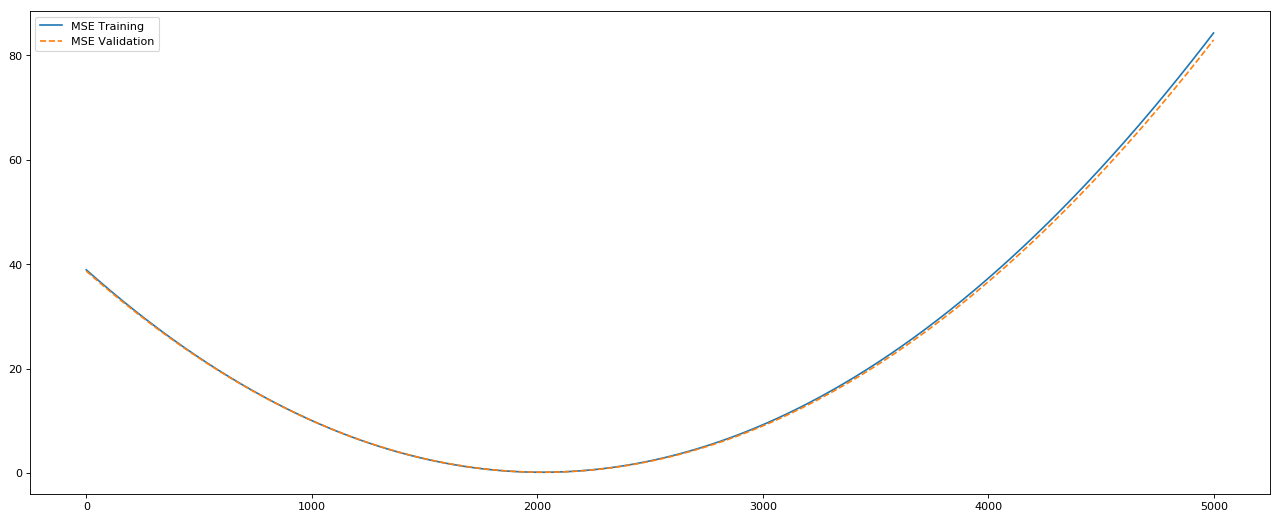

In [16]:
epochs = np.linspace(0, 4999, 5000)

'''
factor = 0.97
minMSEtr = max(trainMSE)-(max(trainMSE)-min(trainMSE))*factor
minMSEva = max(validMSE)-(max(validMSE)-min(validMSE))*factor
for i in epochs:           
    if trainMSE[int(i)]<minMSEtr:
        indexTrain = float(i)
    if validMSE[int(i)]<minMSEva:
        indexValid = float(i)
print('MSETraining: ', indexTrain)
print('MSEValid: ', indexValid)
'''
plt.figure(figsize=(20,8), dpi = 80)
trainingPlot = plt.plot(epochs,  trainMSE, '-', label = 'MSE Training')
validationPlot = plt.plot(epochs,  validMSE, '--', label = 'MSE Validation')
plt.legend(loc=2)

plt.show()


In [17]:
#Missing:
# try different alphas


alpha_list = np.arange(0.001,0.05,0.001) 
